In [37]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
for address, dirs, files in os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/'):
    for name in files: 
       print(os.path.join(address, name))

/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov/data.csv
/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/h

In [39]:
all_names = []
for address, dirs, files in os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/'):
    for name in files: 
       all_names.append((os.path.join(address, name).split("/")[-2]))
unique_names = set(all_names)
unique_names

{'Alexey_Fedorov',
 'Alexey_Ivanov',
 'Alexey_Petrov',
 'Alexey_Smirnov',
 'Anton_Ivanov',
 'Anton_Petrov',
 'Anton_Smirnov',
 'Kirill_Fedorov',
 'Kirill_Petrov',
 'Kirill_Smirnov',
 'Petr_Fedorov',
 'Petr_Ivanov',
 'Petr_Petrov',
 'Petr_Smirnov',
 'Rostislav_Fedorov',
 'Rostislav_Ivanov',
 'Rostislav_Petrov',
 'Rostislav_Smirnov',
 'Vasiliy_Fedorov',
 'Vasiliy_Ivanov',
 'Vasiliy_Petrov'}

In [40]:
all_dates = []
for address, dirs, files in os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/'):
    for name in files: 
       all_dates.append((os.path.join(address, name).split("/")[-3]))
unique_dates = set(all_dates)
unique_dates

{'2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09'}

In [41]:
df = pd.DataFrame()
for address, dirs, files in os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-sizyh/shared/homeworks/python_ds_miniprojects/4/data/'):
    for name in files:
        df_1 = pd.read_csv(os.path.join(address, name))

        for i in unique_names:
            if i in os.path.join(address, name):
                df_1['name'] = i

        for x in unique_dates:
            if x in os.path.join(address, name):
                df_1['date'] = x
            
        df = df.append(df_1)

In [42]:
df_1

,Unnamed: 0,product_id,quantity,name,date
0,0,95,2,Vasiliy_Ivanov,2020-12-07
1,1,83,3,Vasiliy_Ivanov,2020-12-07
2,2,64,1,Vasiliy_Ivanov,2020-12-07


In [43]:
df

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
0,0,18,4,Petr_Fedorov,2020-12-07
1,1,94,4,Petr_Fedorov,2020-12-07
0,0,95,2,Vasiliy_Ivanov,2020-12-07
1,1,83,3,Vasiliy_Ivanov,2020-12-07


In [44]:
df.drop_duplicates(subset=['name', 'product_id', 'date'])\
    .groupby(['name', 'product_id'], as_index=False)\
    .agg({'date':'count'})\
    .sort_values('date', ascending = False)

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
0,Alexey_Fedorov,13,1
109,Petr_Smirnov,21,1
103,Petr_Petrov,64,1
...,...,...,...
54,Anton_Smirnov,28,1
55,Anton_Smirnov,33,1
56,Anton_Smirnov,34,1
57,Anton_Smirnov,40,1


In [45]:
df.groupby('name', as_index=False).agg({'quantity':'sum'}).sort_values('quantity', ascending = False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [46]:
product_purchases = df.groupby('product_id', as_index=False).agg({'quantity':'sum'})

In [47]:
product_purchases

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10
...,...,...
66,94,13
67,95,3
68,96,5
69,97,3


In [48]:
product_purchases.query('product_id == 56')

,product_id,quantity
42,56,18


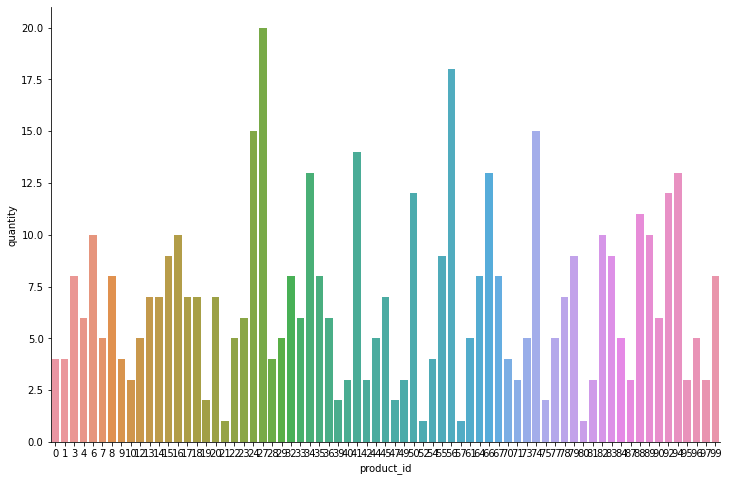

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(data = product_purchases, x='product_id', y='quantity')
sns.despine()

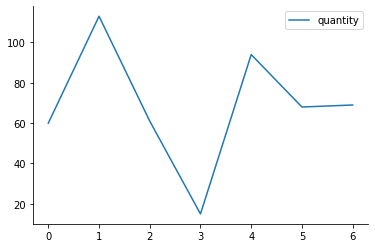

In [50]:
df.groupby('date', as_index = False).agg({'quantity':'sum'}).plot()
sns.despine()